In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rc('font', family = 'Gulim')
mpl.rcParams['axes.unicode_minus']=False

In [2]:
a = pd.read_csv("Project_week.csv", encoding = "euc-kr")

# 서울

In [3]:
a1 = a.iloc[:,[0,2,20]]

In [4]:
b = pd.read_csv("Projecti_population.csv", encoding = "euc-kr")

b = b.transpose()
b.columns = ["전국","서울","부산","대구","인천","광주","대전","울산","세종","경기","강원","충북","충남",
            "전북","전남","경북","경남","제주"]
b =b.iloc[1:]
b = b.astype(int)
b = (b/10000).astype(int)

b_des = b.describe()

population = b_des.iloc[5].astype(int)
population = population * 10000

In [5]:
population["서울"]

9530000

In [6]:
a1.columns = ["week","I", "D"]
a1["S"] = 0
a1["E"] = 0
a1["R"] = 0
a1 = a1[["week","S","E","I","R","D"]]

C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3468046719.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["S"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3468046719.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["E"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3468046719.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

In [7]:
# 잠복기를 1주일~2주일이라고 가정
# E 데이터는 다음주 I + 다다음주 I
for i in range(len(a1) - 2):
    a1.iloc[i,2] = a1.iloc[i + 1, 3] + a1.iloc[i + 2 , 3]

In [8]:
# I 인 사람은 1주일 후에 회복이라고 가정
# R 데이터는 지난주 I - 이번주 D
for i in range(1, len(a1)):
    a1.iloc[i,-2] = a1.iloc[i-1,-2] + a1.iloc[i-1,-3] - a1.iloc[i,-1]

In [9]:
# 전체 인구수 = S + E + I + R + D
# S = 전체인구수 - (E + I + R + D)
a1.iloc[0,1] = population["서울"] - a1.iloc[0,2] - a1.iloc[0,3] - a1.iloc[0,4] - a1.iloc[0,5]
for i in range(1,len(a1)):
    a1.iloc[i,1] = a1.iloc[i-1, 1] - a1.iloc[i,2] - a1.iloc[i,3] - a1.iloc[i,4] - a1.iloc[i,5]

In [10]:
a1["D'"] = 0

In [11]:
a1["D'"] = a1["D"].cumsum()

In [12]:
a1 = a1.iloc[:,[0,1,2,3,4,6]]

In [13]:
a1.columns = [["week", "S", "E", "I", "R", "D"]]

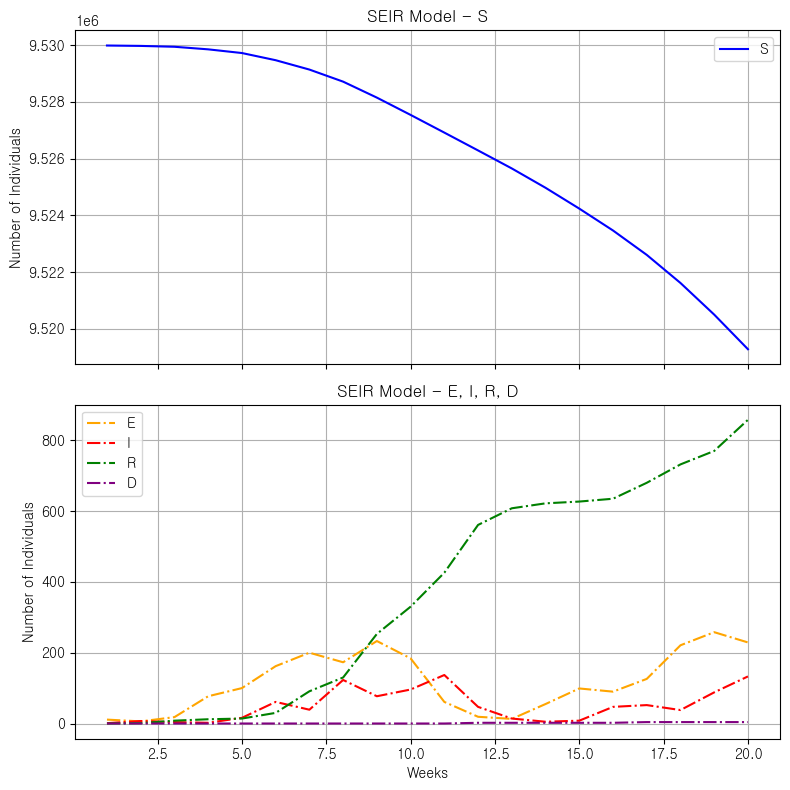

In [14]:
seoul = a1.iloc[:20]
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(seoul['week'], seoul['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(seoul['week'], seoul['E'], label='E', color='orange', linestyle='-.')
ax2.plot(seoul['week'], seoul['I'], label='I', color='red', linestyle='-.')
ax2.plot(seoul['week'], seoul['R'], label='R', color='green', linestyle='-.')
ax2.plot(seoul['week'], seoul['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()


In [15]:
data = seoul

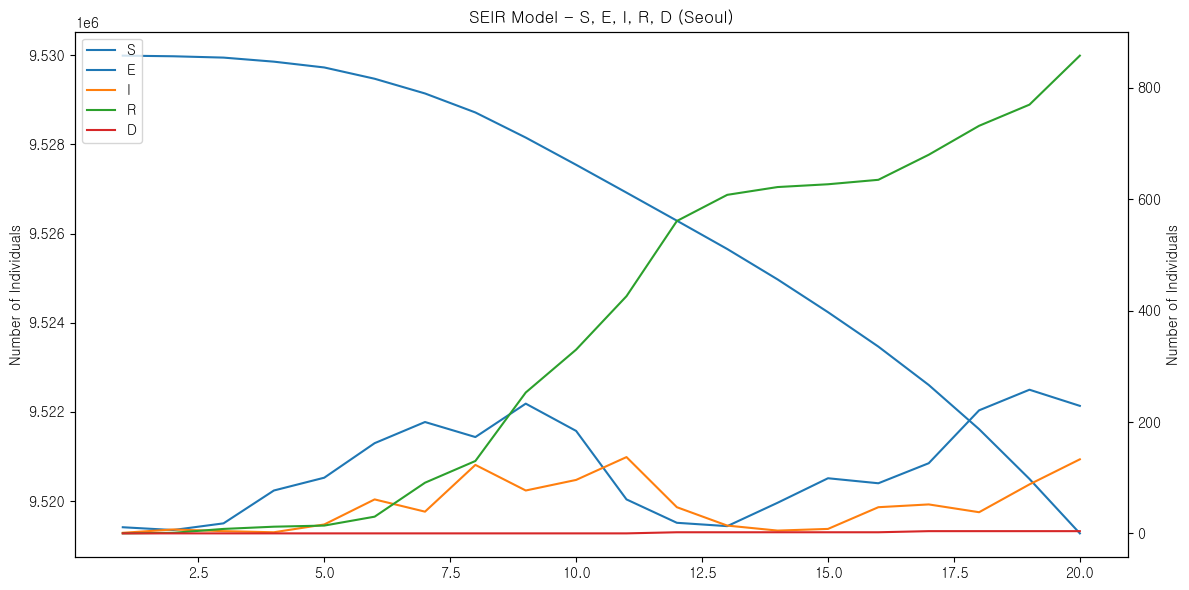

In [16]:
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', linestyle='-')
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', linestyle='-')
ax2.plot(data['week'], data['I'], label='I', linestyle='-')
ax2.plot(data['week'], data['R'], label='R',linestyle='-')
ax2.plot(data['week'], data['D'], label='D',linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D (Seoul)')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()

# 부산

In [17]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주차      181 non-null    int64
 1   총확진     181 non-null    int64
 2   서울확진    181 non-null    int64
 3   부산확진    181 non-null    int64
 4   대구확진    181 non-null    int64
 5   인천확진    181 non-null    int64
 6   광주확진    181 non-null    int64
 7   대전확진    181 non-null    int64
 8   울산확진    181 non-null    int64
 9   세종확진    181 non-null    int64
 10  경기확진    181 non-null    int64
 11  강원확진    181 non-null    int64
 12  충북확진    181 non-null    int64
 13  충남확진    181 non-null    int64
 14  전북확진    181 non-null    int64
 15  전남확진    181 non-null    int64
 16  경북확진    181 non-null    int64
 17  경남확진    181 non-null    int64
 18  제주확진    181 non-null    int64
 19  총사망     181 non-null    int64
 20  서울사망    181 non-null    int64
 21  부산사망    181 non-null    int64
 22  대구사망    181 non-null    int64
 23  인천사망    181 non

In [18]:
a1 = a.iloc[:,[0,3,21]]

In [19]:
a1

,주차,부산확진,부산사망
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,17,0
...,...,...,...
176,177,9459,3
177,178,10335,7
178,179,10291,5
179,180,11679,4


C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3733433762.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["S"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3733433762.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["E"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3733433762.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

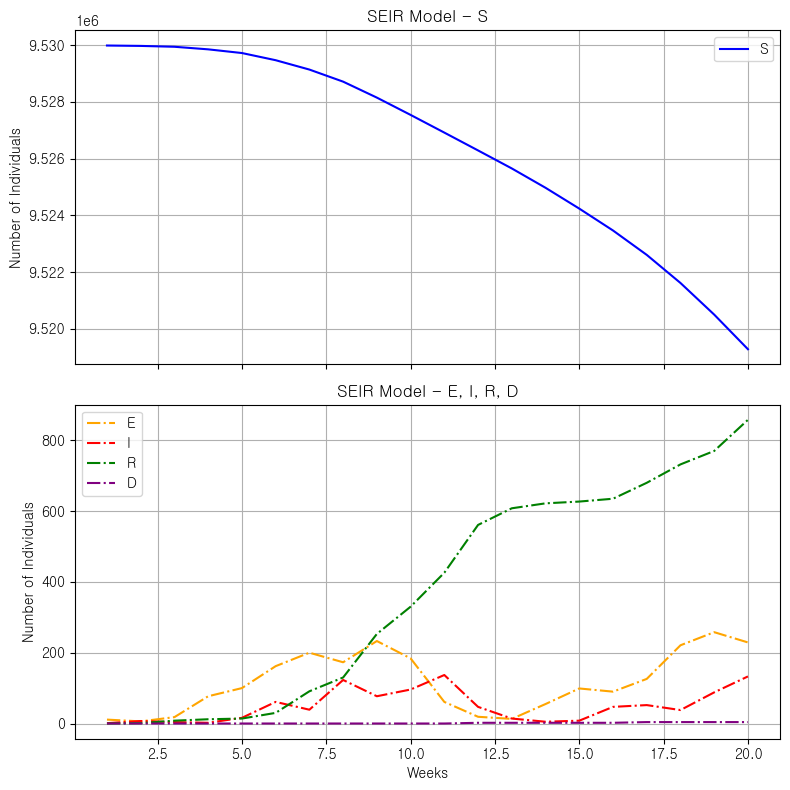

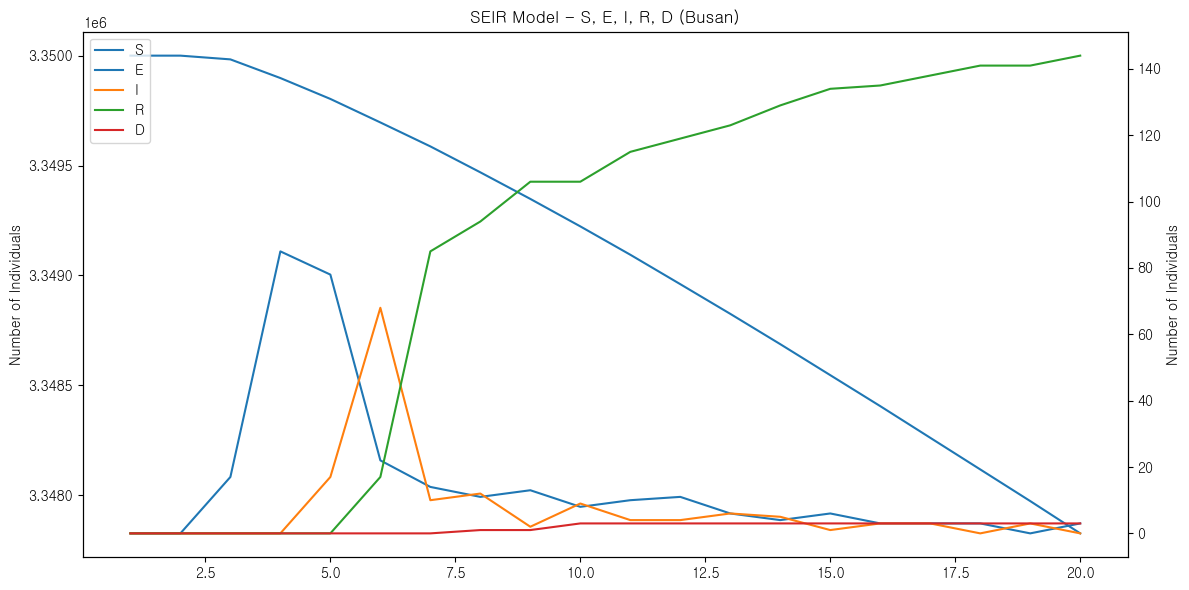

In [20]:
a1.columns = ["week","I", "D"]
a1["S"] = 0
a1["E"] = 0
a1["R"] = 0
a1 = a1[["week","S","E","I","R","D"]]

# 잠복기를 1주일~2주일이라고 가정
# E 데이터는 다음주 I + 다다음주 I
for i in range(len(a1) - 2):
    a1.iloc[i,2] = a1.iloc[i + 1, 3] + a1.iloc[i + 2 , 3]

# I 인 사람은 1주일 후에 회복이라고 가정
# R 데이터는 지난주 I - 이번주 D
for i in range(1, len(a1)):
    a1.iloc[i,-2] = a1.iloc[i-1,-2] + a1.iloc[i-1,-3] - a1.iloc[i,-1]

# 전체 인구수 = S + E + I + R + D
# S = 전체인구수 - (E + I + R + D)
a1.iloc[0,1] = population["부산"] - a1.iloc[0,2] - a1.iloc[0,3] - a1.iloc[0,4] - a1.iloc[0,5]
for i in range(1,len(a1)):
    a1.iloc[i,1] = a1.iloc[i-1, 1] - a1.iloc[i,2] - a1.iloc[i,3] - a1.iloc[i,4] - a1.iloc[i,5]

a1["D'"] = 0
a1["D'"] = a1["D"].cumsum()
a1 = a1.iloc[:,[0,1,2,3,4,6]]
a1.columns = [["week", "S", "E", "I", "R", "D"]]


busan = a1.iloc[:20]
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(seoul['week'], seoul['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(seoul['week'], seoul['E'], label='E', color='orange', linestyle='-.')
ax2.plot(seoul['week'], seoul['I'], label='I', color='red', linestyle='-.')
ax2.plot(seoul['week'], seoul['R'], label='R', color='green', linestyle='-.')
ax2.plot(seoul['week'], seoul['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()

data = busan
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', linestyle='-')
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', linestyle='-')
ax2.plot(data['week'], data['I'], label='I', linestyle='-')
ax2.plot(data['week'], data['R'], label='R',linestyle='-')
ax2.plot(data['week'], data['D'], label='D',linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D (Busan)')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()

# 경남

In [21]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주차      181 non-null    int64
 1   총확진     181 non-null    int64
 2   서울확진    181 non-null    int64
 3   부산확진    181 non-null    int64
 4   대구확진    181 non-null    int64
 5   인천확진    181 non-null    int64
 6   광주확진    181 non-null    int64
 7   대전확진    181 non-null    int64
 8   울산확진    181 non-null    int64
 9   세종확진    181 non-null    int64
 10  경기확진    181 non-null    int64
 11  강원확진    181 non-null    int64
 12  충북확진    181 non-null    int64
 13  충남확진    181 non-null    int64
 14  전북확진    181 non-null    int64
 15  전남확진    181 non-null    int64
 16  경북확진    181 non-null    int64
 17  경남확진    181 non-null    int64
 18  제주확진    181 non-null    int64
 19  총사망     181 non-null    int64
 20  서울사망    181 non-null    int64
 21  부산사망    181 non-null    int64
 22  대구사망    181 non-null    int64
 23  인천사망    181 non

In [22]:
a1 = a.iloc[:,[0,17,35]]

In [23]:
a1

,주차,경남확진,경남사망
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,20,0
...,...,...,...
176,177,7710,3
177,178,7470,3
178,179,7293,3
179,180,8748,7


C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3678659431.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["S"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3678659431.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["E"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\3678659431.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

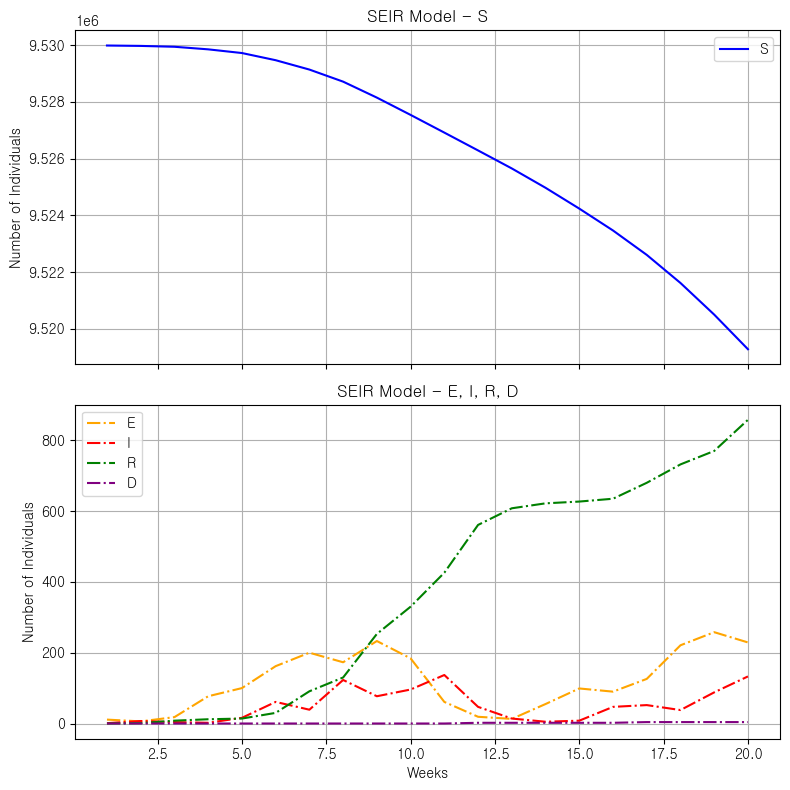

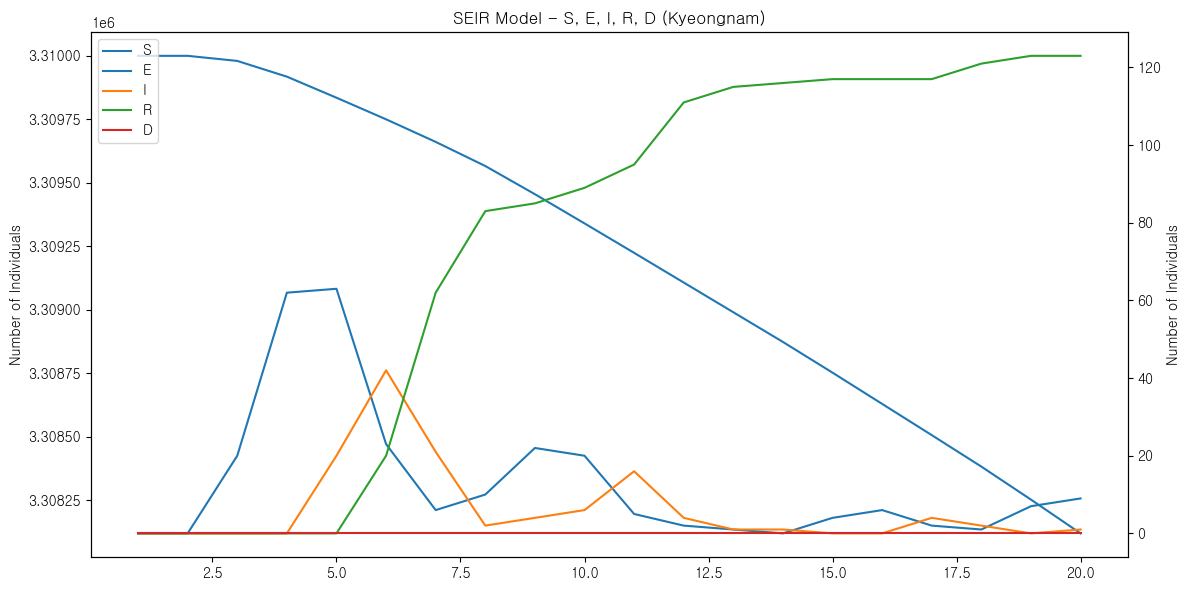

In [24]:
a1.columns = ["week","I", "D"]
a1["S"] = 0
a1["E"] = 0
a1["R"] = 0
a1 = a1[["week","S","E","I","R","D"]]

# 잠복기를 1주일~2주일이라고 가정
# E 데이터는 다음주 I + 다다음주 I
for i in range(len(a1) - 2):
    a1.iloc[i,2] = a1.iloc[i + 1, 3] + a1.iloc[i + 2 , 3]

# I 인 사람은 1주일 후에 회복이라고 가정
# R 데이터는 지난주 I - 이번주 D
for i in range(1, len(a1)):
    a1.iloc[i,-2] = a1.iloc[i-1,-2] + a1.iloc[i-1,-3] - a1.iloc[i,-1]

# 전체 인구수 = S + E + I + R + D
# S = 전체인구수 - (E + I + R + D)
a1.iloc[0,1] = population["경남"] - a1.iloc[0,2] - a1.iloc[0,3] - a1.iloc[0,4] - a1.iloc[0,5]
for i in range(1,len(a1)):
    a1.iloc[i,1] = a1.iloc[i-1, 1] - a1.iloc[i,2] - a1.iloc[i,3] - a1.iloc[i,4] - a1.iloc[i,5]

a1["D'"] = 0
a1["D'"] = a1["D"].cumsum()
a1 = a1.iloc[:,[0,1,2,3,4,6]]
a1.columns = [["week", "S", "E", "I", "R", "D"]]


kn = a1.iloc[:20]
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(seoul['week'], seoul['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(seoul['week'], seoul['E'], label='E', color='orange', linestyle='-.')
ax2.plot(seoul['week'], seoul['I'], label='I', color='red', linestyle='-.')
ax2.plot(seoul['week'], seoul['R'], label='R', color='green', linestyle='-.')
ax2.plot(seoul['week'], seoul['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()

data = kn
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', linestyle='-')
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', linestyle='-')
ax2.plot(data['week'], data['I'], label='I', linestyle='-')
ax2.plot(data['week'], data['R'], label='R',linestyle='-')
ax2.plot(data['week'], data['D'], label='D',linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D (Kyeongnam)')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()

# 제주

In [25]:
a.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181 entries, 0 to 180
Data columns (total 37 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   주차      181 non-null    int64
 1   총확진     181 non-null    int64
 2   서울확진    181 non-null    int64
 3   부산확진    181 non-null    int64
 4   대구확진    181 non-null    int64
 5   인천확진    181 non-null    int64
 6   광주확진    181 non-null    int64
 7   대전확진    181 non-null    int64
 8   울산확진    181 non-null    int64
 9   세종확진    181 non-null    int64
 10  경기확진    181 non-null    int64
 11  강원확진    181 non-null    int64
 12  충북확진    181 non-null    int64
 13  충남확진    181 non-null    int64
 14  전북확진    181 non-null    int64
 15  전남확진    181 non-null    int64
 16  경북확진    181 non-null    int64
 17  경남확진    181 non-null    int64
 18  제주확진    181 non-null    int64
 19  총사망     181 non-null    int64
 20  서울사망    181 non-null    int64
 21  부산사망    181 non-null    int64
 22  대구사망    181 non-null    int64
 23  인천사망    181 non

In [26]:
a1 = a.iloc[:,[0,18,36]]

In [27]:
a1

,주차,제주확진,제주사망
0,1,0,0
1,2,0,0
2,3,0,0
3,4,0,0
4,5,2,0
...,...,...,...
176,177,2624,0
177,178,2889,5
178,179,2761,7
179,180,2743,1


C:\Users\lg\AppData\Local\Temp\ipykernel_7284\429128919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["S"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\429128919.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a1["E"] = 0
C:\Users\lg\AppData\Local\Temp\ipykernel_7284\429128919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.o

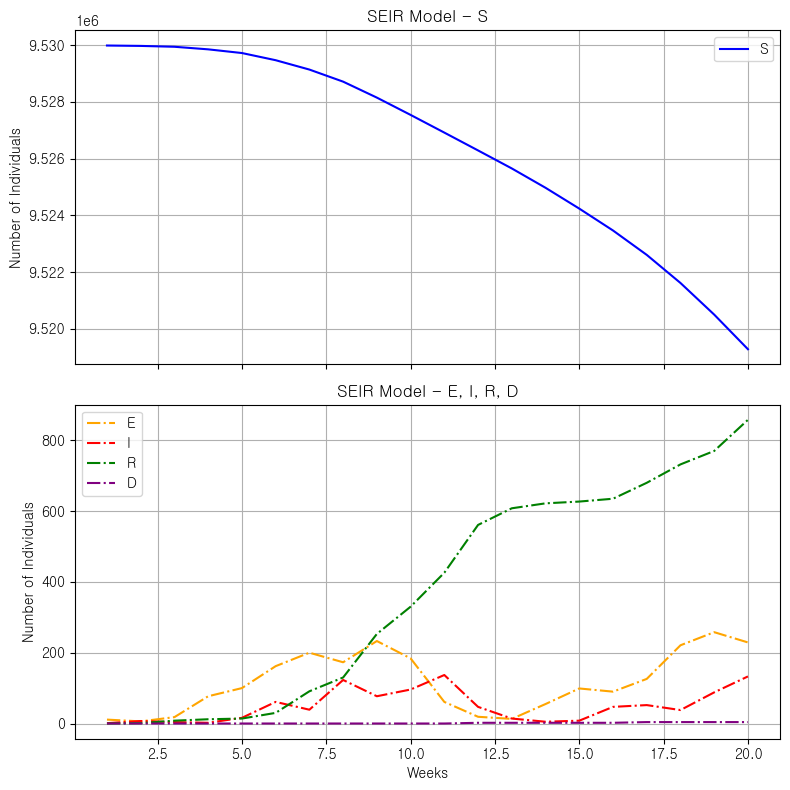

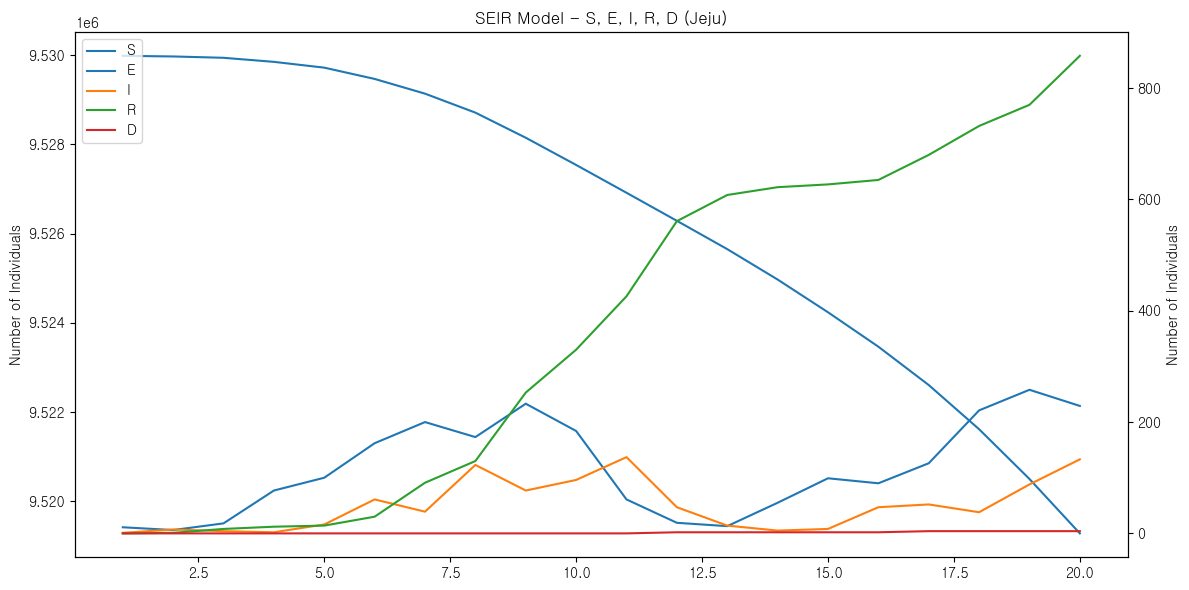

In [28]:
a1.columns = ["week","I", "D"]
a1["S"] = 0
a1["E"] = 0
a1["R"] = 0
a1 = a1[["week","S","E","I","R","D"]]

# 잠복기를 1주일~2주일이라고 가정
# E 데이터는 다음주 I + 다다음주 I
for i in range(len(a1) - 2):
    a1.iloc[i,2] = a1.iloc[i + 1, 3] + a1.iloc[i + 2 , 3]

# I 인 사람은 1주일 후에 회복이라고 가정
# R 데이터는 지난주 I - 이번주 D
for i in range(1, len(a1)):
    a1.iloc[i,-2] = a1.iloc[i-1,-2] + a1.iloc[i-1,-3] - a1.iloc[i,-1]

# 전체 인구수 = S + E + I + R + D
# S = 전체인구수 - (E + I + R + D)
a1.iloc[0,1] = population["제주"] - a1.iloc[0,2] - a1.iloc[0,3] - a1.iloc[0,4] - a1.iloc[0,5]
for i in range(1,len(a1)):
    a1.iloc[i,1] = a1.iloc[i-1, 1] - a1.iloc[i,2] - a1.iloc[i,3] - a1.iloc[i,4] - a1.iloc[i,5]

a1["D'"] = 0
a1["D'"] = a1["D"].cumsum()
a1 = a1.iloc[:,[0,1,2,3,4,6]]
a1.columns = [["week", "S", "E", "I", "R", "D"]]


jeju = a1.iloc[:20]
# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 8), sharex=True)

ax1.plot(seoul['week'], seoul['S'], label='S', color='blue')
ax1.set_ylabel('Number of Individuals')
ax1.set_title('SEIR Model - S')

ax2.plot(seoul['week'], seoul['E'], label='E', color='orange', linestyle='-.')
ax2.plot(seoul['week'], seoul['I'], label='I', color='red', linestyle='-.')
ax2.plot(seoul['week'], seoul['R'], label='R', color='green', linestyle='-.')
ax2.plot(seoul['week'], seoul['D'], label='D', color='purple', linestyle='-.')
ax2.set_xlabel('Weeks')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - E, I, R, D')

ax1.legend()
ax1.grid()
ax2.legend()
ax2.grid()

plt.tight_layout()

plt.show()

data = seoul
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(data['week'], data['S'], label='S', linestyle='-')
ax1.set_ylabel('Number of Individuals')
# ax1.set_title('SEIR Model - S')

ax2 = ax1.twinx()  # Create a secondary y-axis that shares the same x-axis with ax1

ax2.plot(data['week'], data['E'], label='E', linestyle='-')
ax2.plot(data['week'], data['I'], label='I', linestyle='-')
ax2.plot(data['week'], data['R'], label='R',linestyle='-')
ax2.plot(data['week'], data['D'], label='D',linestyle='-')
ax2.set_ylabel('Number of Individuals')
ax2.set_title('SEIR Model - S, E, I, R, D (Jeju)')

# Combine the legends from both subplots
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

# Adjust the layout to prevent label overlapping
fig.tight_layout()
# ax1.grid(True)
# ax2.grid(True)

plt.show()